In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/kc_house_data_cleaned.csv', parse_dates=['date'], index_col=[0])

In [5]:
df['renovated'] = np.where(df.yr_renovated > 0, 1, 0)
df['since_reno'] = np.where(df.yr_renovated < 2015, (1/(2015 - df.yr_renovated)), 0)
df['age'] = np.where(df.yr_built < 2015, (1/(2015 - df.yr_built)), 0)

In [11]:
df['has_basement'] = np.where(df.sqft_basement > 0, 1, 0)
df['basement_lot_pct'] = df.sqft_basement / df.sqft_living * 100
df['aboveground_lot_pct'] = df.sqft_above / df.sqft_living * 100
df['PctofLot'] = round((df.sqft_living / df.sqft_lot)*100,2)
df['likelyApartment'] = np.where(df.PctofLot > 100, 1, 0)

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'since_reno',
       'has_basement', 'basement_lot_pct', 'aboveground_lot_pct', 'PctofLot',
       'age', 'likelyApartment'],
      dtype='object')

In [13]:
df.dtypes

id                              int64
date                   datetime64[ns]
price                         float64
bedrooms                        int64
bathrooms                     float64
sqft_living                     int64
sqft_lot                        int64
floors                        float64
waterfront                      int64
view                            int64
condition                       int64
grade                           int64
sqft_above                      int64
sqft_basement                   int64
yr_built                        int64
yr_renovated                    int64
zipcode                         int64
lat                           float64
long                          float64
sqft_living15                   int64
sqft_lot15                      int64
renovated                       int32
since_reno                    float64
has_basement                    int32
basement_lot_pct              float64
aboveground_lot_pct           float64
PctofLot    

In [33]:
init_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
           'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
            'sqft_lot15', 'renovated', 'since_reno', 'has_basement', 'basement_lot_pct', 'aboveground_lot_pct', 
            'PctofLot', 'age', 'likelyApartment']

In [39]:
standardized = init_features + ['price']

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
min_max_scaler = MinMaxScaler()
dfCopy = df.copy(deep=True)
dfCopy[standardized] = min_max_scaler.fit_transform(dfCopy[standardized])
dfCopy.dropna(inplace=True)
dfCopy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,renovated,since_reno,has_basement,basement_lot_pct,aboveground_lot_pct,PctofLot,age,likelyApartment
0,7129300520,2014-10-13,0.018880,0.222222,0.066667,0.061503,0.003108,0.0,0.0,0.0,...,0.161934,0.005742,0.0,0.000496,0.0,0.000000,1.000000,0.044743,0.016667,0.0
1,6414100192,2014-12-09,0.060352,0.222222,0.233333,0.167046,0.004072,0.4,0.0,0.0,...,0.222165,0.008027,1.0,0.041667,1.0,0.233463,0.766537,0.076141,0.015625,0.0
2,5631500400,2015-02-25,0.013382,0.111111,0.066667,0.030372,0.005743,0.0,0.0,0.0,...,0.399415,0.008513,0.0,0.000496,0.0,0.000000,1.000000,0.016419,0.012195,0.0
3,2487200875,2014-12-09,0.069011,0.333333,0.333333,0.120729,0.002714,0.0,0.0,0.0,...,0.165376,0.004996,0.0,0.000496,1.0,0.696429,0.303571,0.084114,0.020000,0.0
4,1954400510,2015-02-18,0.056678,0.222222,0.200000,0.099468,0.004579,0.0,0.0,0.0,...,0.241094,0.007871,0.0,0.000496,0.0,0.000000,1.000000,0.044550,0.035714,0.0


In [44]:
X = df[init_features]
y = df.price

In [52]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [67]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA('mle')
pca.fit(X_scaled)
display(pca.n_components_)
X_pca = pca.transform(X_scaled)

21

In [60]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [61]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,-2.546416,-1.157064,0.269070,-0.225588,-0.247941,0.062558,-0.582731,-0.331186,0.190848,-0.034074,...,0.429996,-0.340974,0.202626,-0.125316,-0.466679,0.179667,0.210981,0.144305,0.110334,-0.000007
1,0.207424,1.418441,2.930505,5.325090,0.272298,-0.862746,-0.014568,-0.264190,0.210273,-2.723940,...,-0.544824,0.609182,-0.185062,0.067637,0.274015,0.476508,-0.384149,-1.029459,0.322830,0.001147
2,-3.058639,-1.035392,0.773125,-0.495270,-0.157939,0.374707,-0.784686,-0.688774,-0.859478,-0.123455,...,1.072026,-0.402278,-0.529764,0.698263,1.244683,-0.505000,-0.020223,0.439265,0.242653,-0.000807
3,-0.537779,3.747412,-1.136563,-0.548544,-0.330621,-0.555039,1.373089,1.260588,0.418253,0.281129,...,-1.223023,0.095590,0.214023,-0.353464,0.146684,-0.389798,0.184523,0.268516,-0.443870,0.000124
4,-0.757741,-1.388663,0.264546,-0.378326,-0.305341,-0.124123,-0.790466,-0.373324,-0.123736,0.157980,...,-0.247192,-0.642572,0.421069,-0.398305,-0.316285,-0.183525,0.308044,0.162935,0.021993,0.000484


In [62]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
bedrooms,0.258648,0.098212,0.042944,-0.057842,-0.220939,-0.216139,0.148916,0.183968,0.625506,-0.000255,...,0.032688,-0.311794,-0.066855,0.204191,-0.210426,-0.082799,0.030666,-0.003109,0.027259,0.000033
bathrooms,0.379715,0.026496,-0.042535,0.041937,-0.025469,-0.069127,0.055459,0.026133,0.136017,0.033258,...,-0.371663,0.124125,0.147474,-0.401246,0.365607,-0.555542,-0.074491,0.172278,-0.028185,0.000304
sqft_living,0.401779,0.090814,0.099613,-0.065467,-0.099350,-0.038090,0.058132,-0.032171,-0.017436,-0.028078,...,0.155342,0.074762,0.088872,-0.254631,0.099131,0.428896,0.025014,-0.094350,0.060422,-0.000046
sqft_lot,0.075627,-0.007942,0.270643,-0.208327,0.591507,-0.052292,0.092487,0.049756,0.070924,-0.009273,...,0.027671,0.110030,0.592795,0.346049,0.114312,-0.007975,0.073230,0.011296,0.006115,-0.000064
floors,0.254138,-0.230616,-0.158272,0.182203,0.075088,0.053353,0.199675,-0.068032,0.122863,-0.035329,...,-0.082689,0.562671,-0.270980,0.371516,-0.025751,0.124419,-0.444319,0.073167,0.013883,-0.000136
waterfront,0.051987,0.047322,0.099946,0.042527,0.001168,0.687287,-0.172402,0.223097,0.441950,0.127222,...,0.192119,0.004094,0.003825,0.032281,-0.005386,-0.030132,0.033043,0.007195,0.004999,-0.000160
view,0.128601,0.128327,0.114578,0.013830,0.000687,0.613432,-0.053042,-0.065334,-0.254645,0.013397,...,-0.315671,-0.031418,-0.006420,-0.023773,-0.022188,0.028094,-0.002228,-0.056661,-0.052625,-0.000004
condition,-0.090089,0.147285,0.058807,-0.144070,-0.154039,0.089810,0.723444,0.458968,-0.233509,0.102872,...,-0.228945,-0.048465,-0.022891,0.085653,-0.020087,0.044473,0.017893,-0.056452,0.011057,-0.000258
grade,0.375416,-0.026460,0.027460,-0.011792,-0.049728,0.042221,0.027928,-0.156151,-0.285420,0.022513,...,0.111709,-0.062625,0.201696,0.006508,-0.739666,-0.249111,-0.056179,0.201962,-0.007331,0.000461
sqft_above,0.380203,-0.133341,0.151036,-0.058513,-0.126715,-0.029498,0.088607,-0.034119,-0.013118,-0.024024,...,0.173232,0.058577,0.096161,-0.242459,0.080238,0.304502,0.020588,-0.355346,-0.243072,-0.000218


In [63]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

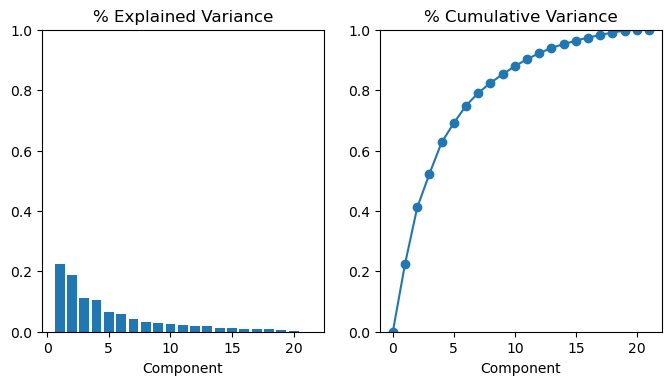

In [66]:
plot_variance(pca);

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score,mean_squared_error

In [75]:
RFRmodel=RandomForestRegressor(n_jobs=-1)
RFRmodel.fit(X_train, y_train) 
RFRpred=RFRmodel.predict(X_test)
rfrScore = RFRmodel.score(X_test, y_test)
print("Mean absolute error:",mean_absolute_error(RFRpred,y_test))
print("Model score",RFRmodel.score(X_test, y_test))

Mean absolute error: 117595.39743720989
Model score 0.7475015975803153


In [78]:
feature_importances = pd.DataFrame(RFRmodel.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
grade,0.347028
sqft_living,0.270501
yr_built,0.069717
sqft_living15,0.061780
PctofLot,0.034865
sqft_lot15,0.031021
age,0.029393
sqft_above,0.027535
waterfront,0.023661
sqft_lot,0.023390


In [ ]:
#From this PCA and feature importances, let's try a model that has about 10 inputs (we'll need zipcode soon)

In [79]:
#From previous work, sqft_living15 / lot15 are correlated to sqft_living/lot, so we'll remove them. Sqft_above also

Index(['grade', 'sqft_living', 'yr_built', 'sqft_living15', 'PctofLot',
       'sqft_lot15', 'age', 'sqft_above', 'waterfront', 'sqft_lot',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'condition',
       'basement_lot_pct', 'floors', 'aboveground_lot_pct', 'since_reno',
       'yr_renovated', 'renovated', 'has_basement', 'likelyApartment'],
      dtype='object')

In [96]:
feats = ['grade', 'sqft_living', 'yr_built', 'PctofLot', 'age', 'waterfront', 'sqft_lot', 'bathrooms', 'view', 'bedrooms']

In [97]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(22, 19))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)

In [98]:
corr = feats + ['price']

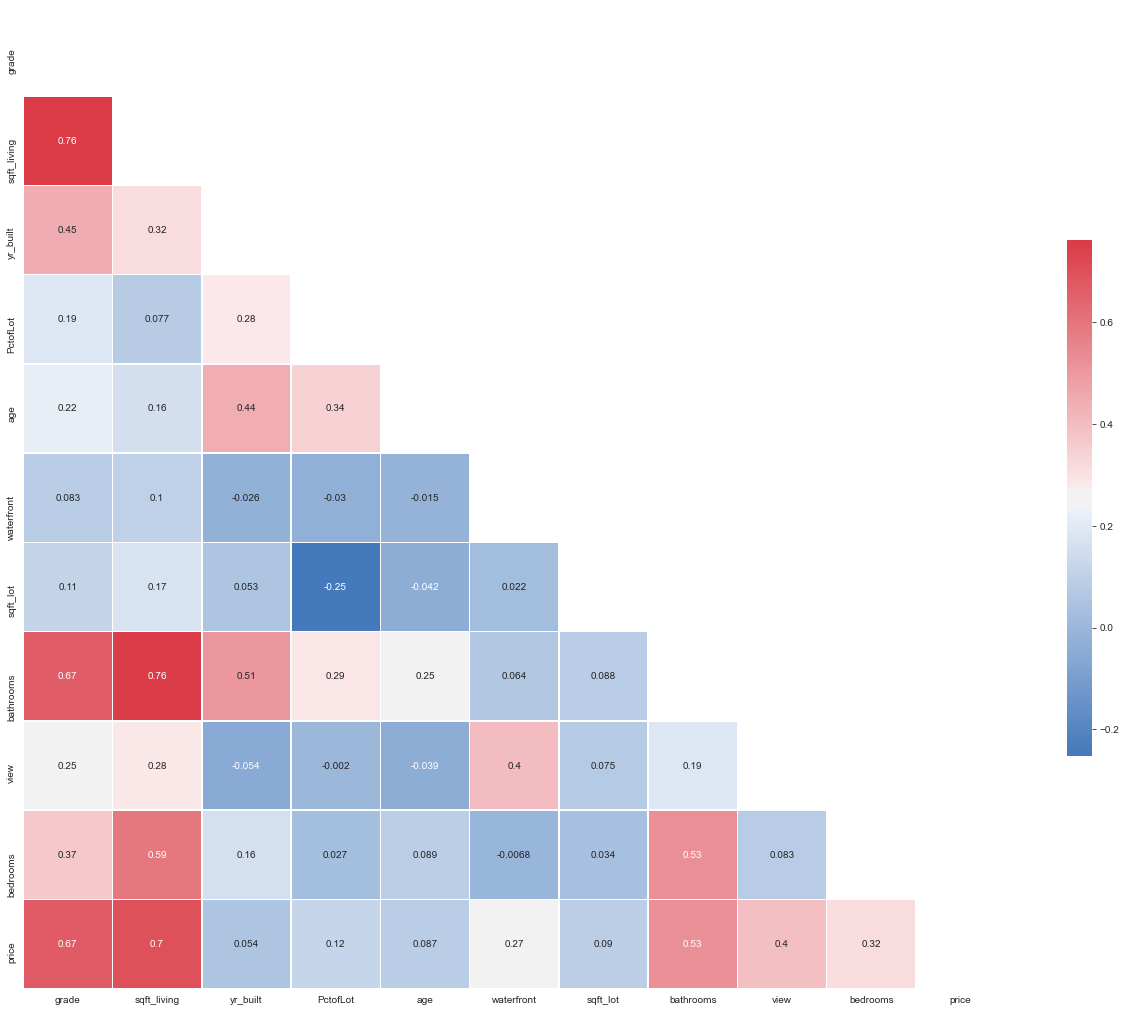

In [99]:
houseMatrix = df[corr].corr()
CorrMtx(houseMatrix, True)

In [48]:
#Let's remove grade and bathrooms. Add condition, floors

2

In [100]:
corr = ['sqft_living', 'yr_built', 'PctofLot', 'age', 'waterfront', 'sqft_lot',
        'view', 'bedrooms', 'condition', 'floors', 'price']

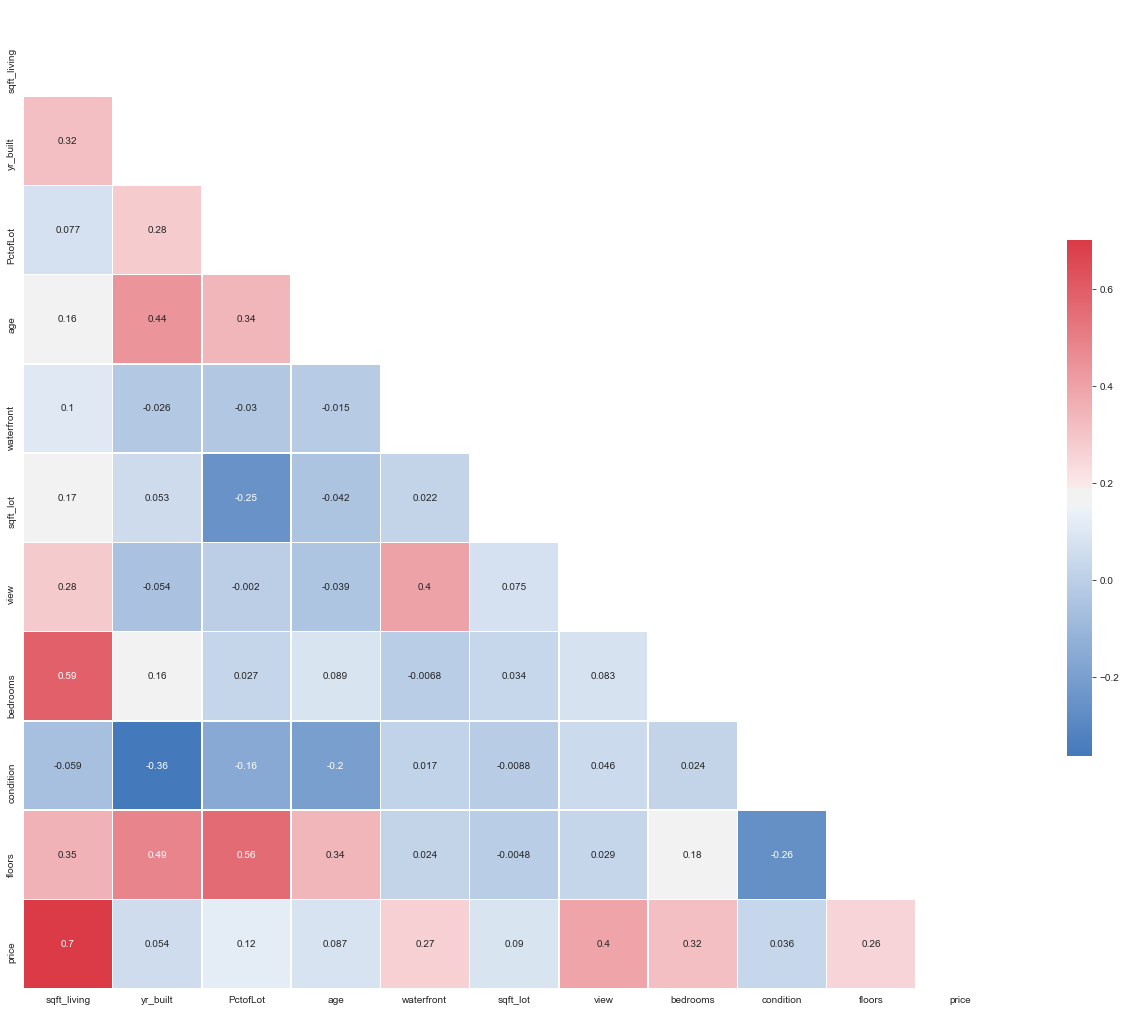

In [101]:
houseMatrix = df[corr].corr()
CorrMtx(houseMatrix, True)

In [ ]:
#Looks pretty good. Let's try our next randomforest

In [103]:
new_feats = ['sqft_living', 'yr_built', 'PctofLot', 'age', 'waterfront', 'sqft_lot',
        'view', 'bedrooms', 'condition', 'floors']

In [104]:
RFRmodel=RandomForestRegressor(n_jobs=-1)
RFRmodel.fit(X_train[new_feats], y_train) 
RFRpred=RFRmodel.predict(X_test[new_feats])
rfrScore = RFRmodel.score(X_test[new_feats], y_test)
print("Mean absolute error:",mean_absolute_error(RFRpred,y_test))
print("Model score",RFRmodel.score(X_test[new_feats], y_test))
feature_importances = pd.DataFrame(RFRmodel.feature_importances_,
                                   index = X_train[new_feats].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

Mean absolute error: 142676.16076179448
Model score 0.6626487357219644


,importance
sqft_living,0.617291
PctofLot,0.083888
sqft_lot,0.070555
age,0.056876
yr_built,0.055701
view,0.036475
waterfront,0.026712
bedrooms,0.023367
floors,0.015801
condition,0.013334


In [106]:
#This is a pretty large fall. Let's see what happens when zipcode info is added

In [105]:
ohe = pd.get_dummies(df.zipcode, sparse=False)
df = df.join(ohe)
oheNames = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
        98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
        98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
        98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
        98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
        98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
        98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
        98166, 98168, 98177, 98178, 98188, 98198, 98199]

In [109]:
new_feats = new_feats + oheNames
X = df[new_feats]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [110]:
RFRmodel=RandomForestRegressor(n_jobs=-1)
RFRmodel.fit(X_train, y_train) 
RFRpred=RFRmodel.predict(X_test)
rfrScore = RFRmodel.score(X_test, y_test)
print("Mean absolute error:",mean_absolute_error(RFRpred,y_test))
print("Model score",RFRmodel.score(X_test, y_test))
feature_importances = pd.DataFrame(RFRmodel.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

Mean absolute error: 90584.69520884831
Model score 0.8313651007484171


,importance
sqft_living,0.559852
PctofLot,0.041270
view,0.035987
age,0.034646
yr_built,0.033116
...,...
98010,0.000094
98070,0.000088
98070,0.000085
98148,0.000028


In [111]:
#Already, this shows a large improvement. When we go later to use different models, we now have a choice baseline 

In [115]:
standardized = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'since_reno', 
                'has_basement', 'basement_lot_pct', 'aboveground_lot_pct', 'PctofLot', 'age', 'likelyApartment']
standardized = standardized + oheNames

In [116]:
#The last thing we do is MinMaxScale to make modeling easier

In [118]:
min_max_scaler = MinMaxScaler()
dfCopy = df.copy(deep=True)
dfCopy[standardized] = min_max_scaler.fit_transform(dfCopy[standardized])
dfCopy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,0.018880,0.222222,0.066667,0.061503,0.003108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,2014-12-09,0.060352,0.222222,0.233333,0.167046,0.004072,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2015-02-25,0.013382,0.111111,0.066667,0.030372,0.005743,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,2014-12-09,0.069011,0.333333,0.333333,0.120729,0.002714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2015-02-18,0.056678,0.222222,0.200000,0.099468,0.004579,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
dfCopy.to_csv('../data/min_max_df.csv')